In [2]:
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot  as plt

In [6]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    ".\PlantVillage",
     image_size=(256, 256),batch_size=32
)

Found 2152 files belonging to 3 classes.


In [7]:
class_names=dataset.class_names

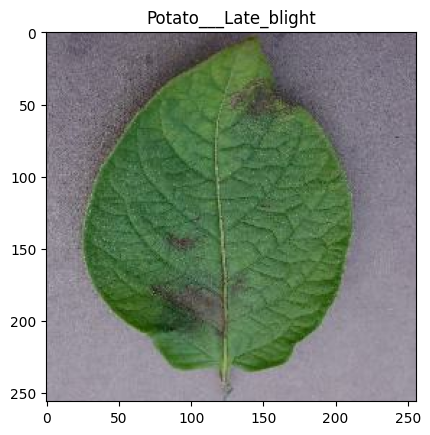

In [8]:
for image_batch, label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype("uint8"))
  plt.title(class_names[label_batch[0]])

In [9]:
Epoch=50

In [10]:
train_size=0.8

In [11]:
len(dataset)*train_size

54.400000000000006

In [12]:
train_ds=dataset.take(54)

In [13]:
test_ds=dataset.skip(54)

In [14]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [15]:
val_ds=test_ds.take(6)

In [16]:
test_ds=test_ds.skip(6)

In [17]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
# mettre dans le cache pour eviter de le lire chaque fois
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
resize_and_rescale=tf.keras.Sequential([
    layers.Resizing(256,256),
    layers.Rescaling(1./255)
])

In [19]:
data_augmentation=tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2)
    ]
)

In [20]:
model = models.Sequential([
    tf.keras.Input(shape=(256, 256, 3)),  # Spécifie la taille de l'entrée
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])



In [21]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [36]:
history=model.fit(
    train_ds,
    batch_size=32,
    validation_data=val_ds,
    epochs=3
)

Epoch 1/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 42s 764ms/step - accuracy: 0.9858 - loss: 0.0494 - val_accuracy: 0.9635 - val_loss: 0.1100
Epoch 2/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 40s 734ms/step - accuracy: 0.9788 - loss: 0.0453 - val_accuracy: 0.9792 - val_loss: 0.0878
Epoch 3/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 39s 728ms/step - accuracy: 0.9895 - loss: 0.0372 - val_accuracy: 0.9688 - val_loss: 0.0956


In [37]:
model.save('mon_modele.keras')

In [40]:
model_loaded = tf.keras.models.load_model("mon_modele.keras")
